In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

PROJ_ROOT = os.pardir

TRAIN_DATA = os.path.join(PROJ_ROOT, "data", "raw", "train.csv")
TEST_DATA = os.path.join(PROJ_ROOT, "data", "raw", "test.csv")

import sys
sys.path.append(os.path.join(PROJ_ROOT, "src"))

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# from fastai.imports import *
# from fastai.structured import *

# from pandas_summary import DataFrameSummary
from IPython.display import display

import pandas as pd
import numpy as np

# from fastai.imports import *
# from fastai.torch_imports import *
# from fastai.transforms import *
# from fastai.conv_learner import *
# from fastai.model import *
# from fastai.dataset import *
# from fastai.sgdr import *
# from fastai.plots import *

In [3]:
PATH = os.path.join(PROJ_ROOT, "data", "raw/")

PATH


from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
!ls {PATH} 

bodyfat-test.csv             kaggle_solution_template.csv
bodyfat-train.csv


In [5]:
train_df = pd.read_csv(f"{PATH}/bodyfat-train.csv")
test_df = pd.read_csv(f"{PATH}/bodyfat-test.csv")

In [6]:
train_df.describe()

,Body fat (%),Age (years),Weight (lbs),Height (inches),Neck (cm),Chest (cm),Abdomen (cm),Hip (cm),Thigh (cm),Knee (cm),Ankle (cm),Biceps (cm),Forearm (cm),Wrist (cm)
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,18.977612,44.631841,178.370398,70.009950,37.992537,100.500000,92.392537,99.885572,59.407960,38.574627,23.060697,32.197015,28.645771,18.216418
std,8.391314,12.462896,30.489848,3.859877,2.549803,8.508314,10.973468,7.399307,5.503221,2.481875,1.647027,3.196043,2.080167,0.935189
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,22.000000,15.800000
25%,12.500000,35.000000,157.000000,68.250000,36.300000,94.000000,84.400000,95.500000,56.000000,36.900000,22.000000,30.000000,27.200000,17.600000
50%,19.200000,43.000000,176.000000,70.000000,38.000000,99.600000,90.900000,99.300000,58.900000,38.600000,22.800000,31.900000,28.700000,18.300000
75%,24.700000,54.000000,198.000000,72.250000,39.600000,105.300000,99.100000,103.700000,63.100000,39.900000,24.000000,34.600000,30.100000,18.800000
max,47.500000,81.000000,363.150000,77.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
train_df_orig = train_df.copy()

In [8]:
train_df.corr()["Body fat (%)"]

Body fat (%)       1.000000
Age (years)        0.281098
Weight (lbs)       0.604166
Height (inches)   -0.123521
Neck (cm)          0.487892
Chest (cm)         0.712247
Abdomen (cm)       0.812182
Hip (cm)           0.628160
Thigh (cm)         0.560525
Knee (cm)          0.493188
Ankle (cm)         0.269730
Biceps (cm)        0.521717
Forearm (cm)       0.400249
Wrist (cm)         0.366006
Name: Body fat (%), dtype: float64

In [9]:
len(train_df)

201

In [132]:
train_df = train_df_orig.copy()

train_df['height_cm'] = train_df['Height (inches)']*2.54

In [133]:
def create_ratio(df, col1, col2):
    col_name = f"{col1}_{col2}_ratio"
    df[col_name] = df[col1]/df[col2]
    return col_name

In [134]:
ratio_list = [('height_cm',"Weight (lbs)"),
("Chest (cm)","Hip (cm)"),
("Age (years)","Weight (lbs)"),
("Knee (cm)","Thigh (cm)"),
("Chest (cm)","Abdomen (cm)")]

ratio_cols = []
for col1, col2 in ratio_list: 
    ratio_cols.append(create_ratio(train_df, col1,col2))
ratio_cols

['height_cm_Weight (lbs)_ratio',
 'Chest (cm)_Hip (cm)_ratio',
 'Age (years)_Weight (lbs)_ratio',
 'Knee (cm)_Thigh (cm)_ratio',
 'Chest (cm)_Abdomen (cm)_ratio']

In [135]:
columns_to_train = ['height_cm', "Age (years)", "Abdomen (cm)", "Neck (cm)"]
columns_to_train += ratio_cols
#columns_to_train += ['lbm']
columns_to_train

['height_cm',
 'Age (years)',
 'Abdomen (cm)',
 'Neck (cm)',
 'height_cm_Weight (lbs)_ratio',
 'Chest (cm)_Hip (cm)_ratio',
 'Age (years)_Weight (lbs)_ratio',
 'Knee (cm)_Thigh (cm)_ratio',
 'Chest (cm)_Abdomen (cm)_ratio']

In [136]:
train_df.columns

Index(['Body fat (%)', 'Age (years)', 'Weight (lbs)', 'Height (inches)',
       'Neck (cm)', 'Chest (cm)', 'Abdomen (cm)', 'Hip (cm)', 'Thigh (cm)',
       'Knee (cm)', 'Ankle (cm)', 'Biceps (cm)', 'Forearm (cm)', 'Wrist (cm)',
       'height_cm', 'height_cm_Weight (lbs)_ratio',
       'Chest (cm)_Hip (cm)_ratio', 'Age (years)_Weight (lbs)_ratio',
       'Knee (cm)_Thigh (cm)_ratio', 'Chest (cm)_Abdomen (cm)_ratio'],
      dtype='object')

### Body Fat Formula For Women
- Factor 1	(Total body weight x 0.732) + 8.987
- Factor 2	Wrist measurement (at fullest point) / 3.140
- Factor 3	Waist measurement (at naval) x 0.157
- Factor 4	Hip measurement (at fullest point) x 0.249
- Factor 5	Forearm measurement (at fullest point) x 0.434
Lean Body Mass	Factor 1 + Factor 2 - Factor 3 - Factor 4 + Factor 5

#### Body Fat Weight	Total bodyweight - Lean Body Mass
#### Body Fat Percentage	(Body Fat Weight x 100) / total bodyweight
 
### Body Fat Formula For Men
- Factor 1	(Total body weight x 1.082) + 94.42
- Factor 2	Waist measurement x 4.15
#### Lean Body Mass	Factor 1 - Factor 2
#### Body Fat Weight	Total bodyweight - Lean Body Mass

In [ ]:
f1 = (train_df['Weight (lbs)'] * 0.732) + 8.987
f2 = train_df['Wrist (cm)'] / 3.140
f3 = train_df['Abdomen (cm)'] * 0.157
f4 = train_df['Hip (cm)']*0.249
f5 = train_df['Forearm (cm)']*0.434

train_df['lbm'] = train_df['Weight (lbs)'] - (f1+f2-f3-f4+f5)


In [ ]:
f1_ = (train_df['Weight (lbs)'] * 1.082) + 94.42
f2_ = train_df['Abdomen (cm)'] * 4.12
train_df['lbm2'] = train_df['Weight (lbs)'] - (f1 - f2)

In [ ]:
train_df.columns

In [ ]:
train_df.corr()["Body fat (%)"]

In [32]:


from matplotlib import pyplot as plt
import seaborn as sns
def plot_feature(col_name):
    print(f"===========>{col_name}")
    plt.figure()
    sns.boxplot(x=train_df[col_name])

#     plt.plot(train_df[col_name])
    plt.show()
    plt.clf()
    plt.close()
    print(train_df[col_name].describe())
    return None

===========>Abdomen (cm)


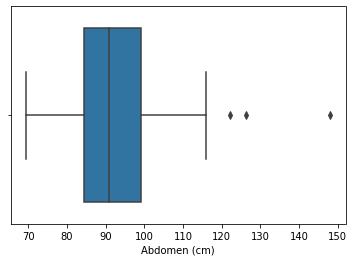

count    201.000000
mean      92.392537
std       10.973468
min       69.400000
25%       84.400000
50%       90.900000
75%       99.100000
max      148.100000
Name: Abdomen (cm), dtype: float64


In [33]:
plot_feature('Abdomen (cm)')

===========>Body fat (%)


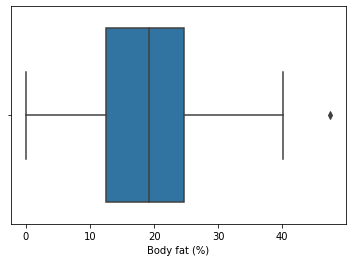

count    201.000000
mean      18.977612
std        8.391314
min        0.000000
25%       12.500000
50%       19.200000
75%       24.700000
max       47.500000
Name: Body fat (%), dtype: float64
===========>Age (years)


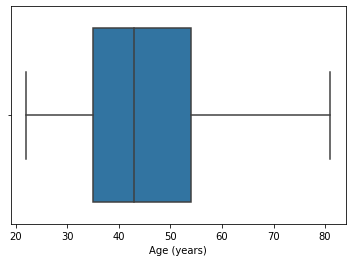

count    201.000000
mean      44.631841
std       12.462896
min       22.000000
25%       35.000000
50%       43.000000
75%       54.000000
max       81.000000
Name: Age (years), dtype: float64
===========>Weight (lbs)


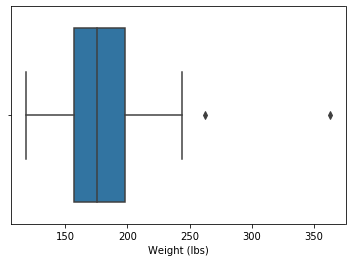

count    201.000000
mean     178.370398
std       30.489848
min      118.500000
25%      157.000000
50%      176.000000
75%      198.000000
max      363.150000
Name: Weight (lbs), dtype: float64
===========>Height (inches)


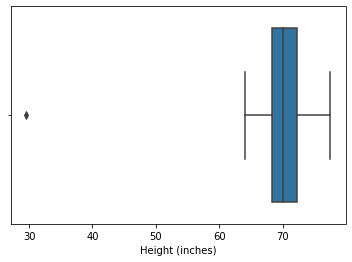

count    201.000000
mean      70.009950
std        3.859877
min       29.500000
25%       68.250000
50%       70.000000
75%       72.250000
max       77.500000
Name: Height (inches), dtype: float64
===========>Neck (cm)


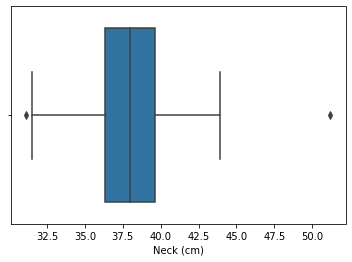

count    201.000000
mean      37.992537
std        2.549803
min       31.100000
25%       36.300000
50%       38.000000
75%       39.600000
max       51.200000
Name: Neck (cm), dtype: float64
===========>Chest (cm)


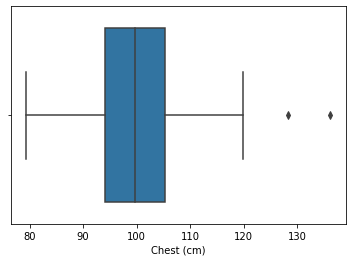

count    201.000000
mean     100.500000
std        8.508314
min       79.300000
25%       94.000000
50%       99.600000
75%      105.300000
max      136.200000
Name: Chest (cm), dtype: float64
===========>Abdomen (cm)


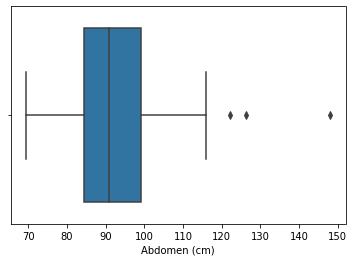

count    201.000000
mean      92.392537
std       10.973468
min       69.400000
25%       84.400000
50%       90.900000
75%       99.100000
max      148.100000
Name: Abdomen (cm), dtype: float64
===========>Hip (cm)


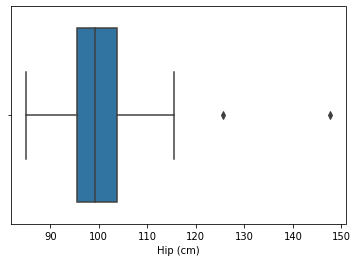

count    201.000000
mean      99.885572
std        7.399307
min       85.000000
25%       95.500000
50%       99.300000
75%      103.700000
max      147.700000
Name: Hip (cm), dtype: float64
===========>Thigh (cm)


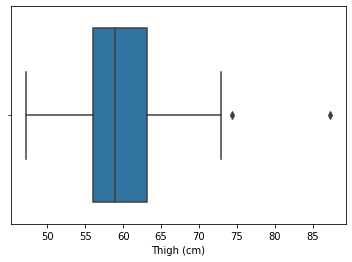

count    201.000000
mean      59.407960
std        5.503221
min       47.200000
25%       56.000000
50%       58.900000
75%       63.100000
max       87.300000
Name: Thigh (cm), dtype: float64
===========>Knee (cm)


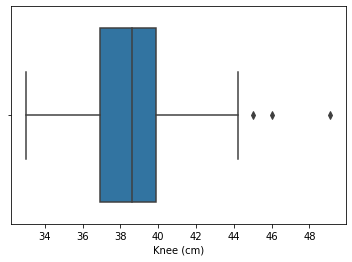

count    201.000000
mean      38.574627
std        2.481875
min       33.000000
25%       36.900000
50%       38.600000
75%       39.900000
max       49.100000
Name: Knee (cm), dtype: float64
===========>Ankle (cm)


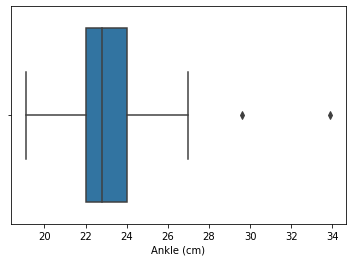

count    201.000000
mean      23.060697
std        1.647027
min       19.100000
25%       22.000000
50%       22.800000
75%       24.000000
max       33.900000
Name: Ankle (cm), dtype: float64
===========>Biceps (cm)


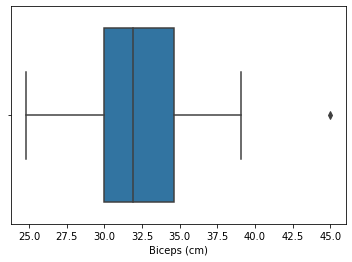

count    201.000000
mean      32.197015
std        3.196043
min       24.800000
25%       30.000000
50%       31.900000
75%       34.600000
max       45.000000
Name: Biceps (cm), dtype: float64
===========>Forearm (cm)


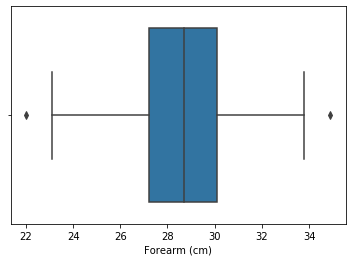

count    201.000000
mean      28.645771
std        2.080167
min       22.000000
25%       27.200000
50%       28.700000
75%       30.100000
max       34.900000
Name: Forearm (cm), dtype: float64
===========>Wrist (cm)


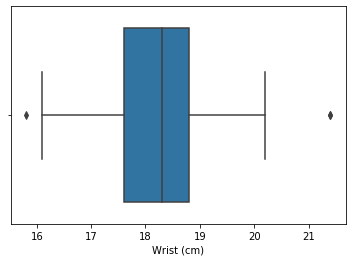

count    201.000000
mean      18.216418
std        0.935189
min       15.800000
25%       17.600000
50%       18.300000
75%       18.800000
max       21.400000
Name: Wrist (cm), dtype: float64
===========>height_cm


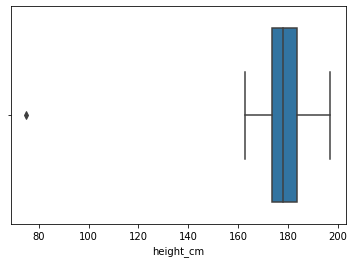

count    201.000000
mean     177.825274
std        9.804088
min       74.930000
25%      173.355000
50%      177.800000
75%      183.515000
max      196.850000
Name: height_cm, dtype: float64
===========>height_cm_Weight (lbs)_ratio


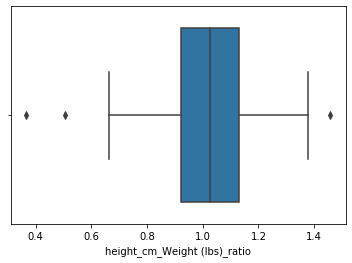

count    201.000000
mean       1.021079
std        0.154062
min        0.365512
25%        0.922747
50%        1.024598
75%        1.129329
max        1.457553
Name: height_cm_Weight (lbs)_ratio, dtype: float64
===========>Chest (cm)_Hip (cm)_ratio


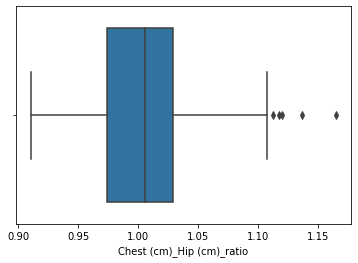

count    201.000000
mean       1.006257
std        0.045369
min        0.910891
25%        0.974312
50%        1.005607
75%        1.029106
max        1.164370
Name: Chest (cm)_Hip (cm)_ratio, dtype: float64
===========>Age (years)_Weight (lbs)_ratio


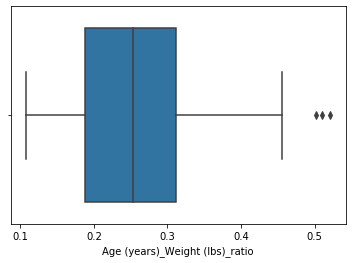

count    201.000000
mean       0.257387
std        0.084597
min        0.107549
25%        0.187643
50%        0.253165
75%        0.311377
max        0.521415
Name: Age (years)_Weight (lbs)_ratio, dtype: float64
===========>Knee (cm)_Thigh (cm)_ratio


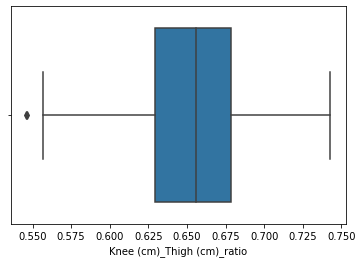

count    201.000000
mean       0.651615
std        0.034656
min        0.545699
25%        0.629508
50%        0.655822
75%        0.678439
max        0.742857
Name: Knee (cm)_Thigh (cm)_ratio, dtype: float64
===========>Chest (cm)_Abdomen (cm)_ratio


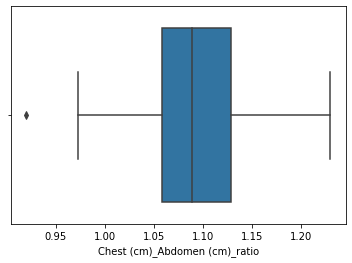

count    201.000000
mean       1.092724
std        0.055874
min        0.919649
25%        1.058625
50%        1.088935
75%        1.128440
max        1.229487
Name: Chest (cm)_Abdomen (cm)_ratio, dtype: float64


In [34]:
for feature in train_df.columns:
    plot_feature(feature)

In [ ]:
print(f"mean max min max_count min_count")
for col in train_df.columns:
    max_val = np.max(train_df[col])
    min_val = np.min(train_df[col])
    avg = np.mean(train_df[col])
    max_count = len(train_df[train_df[col]>((max_val - avg)/2)])
    min_count = len(train_df[train_df[col]>((avg-min_val)/2)])
    print(f"{avg} \t {max_val} \t {min_val} \t {max_count} \t {min_count} \t {col} ")
    

In [ ]:
[train_df['Body fat (%)'] > ((47.5-18.9)//2)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler(copy = False)
mm_df = train_df.copy()

mm_scaler.fit(mm_df)
mm_scaler.transform(mm_df)

mm_df.head()

In [137]:
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [138]:
models = [RandomForestRegressor, GradientBoostingRegressor, LGBMRegressor, XGBRegressor, ExtraTreesRegressor, AdaBoostRegressor,
          BaggingRegressor, SVR, LinearRegression, Ridge, Lasso]

In [192]:
target = train_df["Body fat (%)"]
train_X, test_X, train_y, test_y = train_test_split(train_df[columns_to_train], target, test_size = 0.2, random_state = 43)



In [197]:
from scipy import stats

def remove_outliers(features_df,target_df,z_score=2.75):
    X = features_df
    y = target_df
    if len(X) != len(y):
        print(f"Error: Number of samples in feature and target dataframe are not same : {len(X)} and {len(y)} ")
        return
    mask = (np.abs(stats.zscore(X)) < z_score).all(axis=1)
    print(f"Removed {len(X) - len(X[mask])} outlier samples out of {len(X)} from feature and target dataframes")
    return X[mask],y[mask]

train_X_or, train_y_or = remove_outliers(train_X, train_y)

Removed 9 outlier samples out of 160 from feature and target dataframes


In [194]:
len(train_X_or), len(train_X), len(train_y_or), len(train_y)
#train_X = train_X_or

(151, 160, 151, 160)

In [167]:
train_X = train_X_or
train_y = train_y_or

In [168]:
d = {}
model = None
for model in models:
    print(f"Training {model}")
    d[model] = model()
    d[model].fit(train_X, train_y)
    pred = d[model].predict(test_X)
    r2 = r2_score(pred, test_y)
    mas = mean_absolute_error(pred, test_y)
    print(f"r2: {r2} \t mas: {mas} \t Model {model}")
    d[model] = [d[model], r2, mas]
    

Training <class 'sklearn.ensemble.forest.RandomForestRegressor'>
r2: 0.31990010966052906 	 mas: 3.8656097560975606 	 Model <class 'sklearn.ensemble.forest.RandomForestRegressor'>
Training <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
r2: 0.31897389369658324 	 mas: 4.260922571852791 	 Model <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
Training <class 'lightgbm.sklearn.LGBMRegressor'>
r2: 0.5073426208989071 	 mas: 3.7017729318445793 	 Model <class 'lightgbm.sklearn.LGBMRegressor'>
Training <class 'xgboost.sklearn.XGBRegressor'>
r2: 0.3340110040133133 	 mas: 4.073500921668076 	 Model <class 'xgboost.sklearn.XGBRegressor'>
Training <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
r2: 0.3901488603078621 	 mas: 3.86780487804878 	 Model <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
Training <class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>
r2: 0.3155672135365194 	 mas: 3.8612464047713293 	 Model <class 'sklearn.ensembl

In [169]:
from lightgbm.sklearn import LGBMModel

random_state = 42

def get_lgbm_obj():
    return LGBMRegressor( objective = 'regression',
                        scale_pos_weight = 1,
                          metric = "auc", 
                          boosting = 'gbdt', 
                          max_depth = -1, 
                          num_leaves = 13, 
                          learning_rate = 0.01, 
                          bagging_freq = 5, 
                          bagging_fraction = 0.4, 
                          feature_fraction = 0.05, 
                          min_data_in_leaf = 80, 
                          min_sum_heassian_in_leaf = 10, 
                          tree_learner = "serial", 
                          boost_from_average = False, 
                          bagging_seed = random_state, 
                          verbosity = 1, 
                          seed = random_state,
                         num_boost_round = 100000,
                         is_training_metric = True,
                         is_provide_training_metric=True)

def get_lgbm_obj2():
    return LGBMRegressor( objective = 'regression',
                          metric = "auc", 
                          seed = random_state,
                         num_boost_round = 100000,
                         is_training_metric = True,
                         is_provide_training_metric=True)
                          
                          

In [170]:
lgbm = get_lgbm_obj2()

In [171]:
lgbm.fit(train_X, train_y)

/Users/vthotakura/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', is_provide_training_metric=True,
       is_training_metric=True, learning_rate=0.1, max_depth=-1,
       metric='auc', min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1,
       num_boost_round=100000, num_leaves=31, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, seed=42,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

In [172]:
pred = lgbm.predict(test_X)

In [173]:
r2 = r2_score(pred, test_y)
mas = mean_absolute_error(pred, test_y)
print(f"Model {model}, r2: {r2}, mas: {mas}")


Model <class 'sklearn.linear_model.coordinate_descent.Lasso'>, r2: 0.4164362692995276, mas: 4.417779809657288
